Code #1

C:\Users\Saad\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Saad\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Saad\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Saad\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Saad\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but

[554.70803103]
[593.11701351]


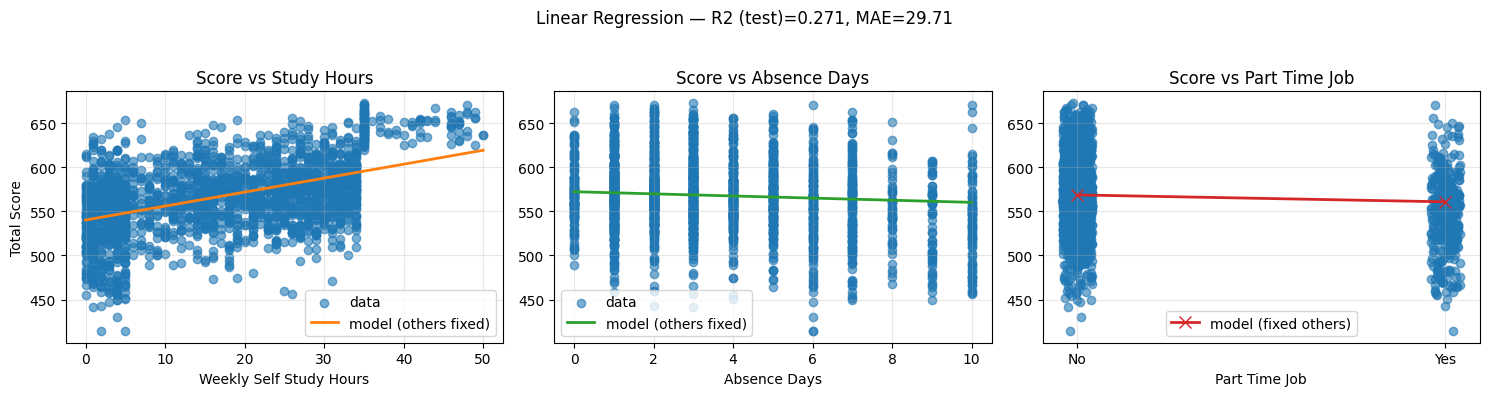

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
# import seaborn as sns

# Load dataset
data = pd.read_csv('student-scores.csv')
data.fillna(0, inplace=True)
# print(data.columns)

df = pd.DataFrame(data)
# print(df.head())

le = LabelEncoder()
df['part_time_job'] = le.fit_transform(df['part_time_job'])
# print(df['part_time_job'])    # works fine

# Feature selection
X = df[['weekly_self_study_hours', 'absence_days', 'part_time_job']]
y = df['total_score']
# X, y

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# print(y_pred)

new_pred = model.predict([[10, 4, 0]])
print(new_pred)

new_pred = model.predict([[32, 1, 0]])
print(new_pred)

# Clear, simple plots without seaborn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error

# Metrics on test set
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

weekly_med = df['weekly_self_study_hours'].median()
absence_med = df['absence_days'].median()
part_mode = int(df['part_time_job'].mode()[0])

plt.figure(figsize=(15, 4))

# 1) Total Score vs Weekly Self Study Hours (fix other features at medians/mode)
plt.subplot(1, 3, 1)
x = np.linspace(df['weekly_self_study_hours'].min(), df['weekly_self_study_hours'].max(), 200)
X_pred = np.column_stack([x, np.full_like(x, absence_med), np.full_like(x, part_mode)])
y_line = model.predict(X_pred)
plt.scatter(df['weekly_self_study_hours'], df['total_score'], color='C0', alpha=0.6, label='data')
plt.plot(x, y_line, color='C1', linewidth=2, label='model (others fixed)')
plt.xlabel('Weekly Self Study Hours')
plt.ylabel('Total Score')
plt.title('Score vs Study Hours')
plt.grid(alpha=0.3)
plt.legend()

# 2) Total Score vs Absence Days (fix others)
plt.subplot(1, 3, 2)
x = np.linspace(df['absence_days'].min(), df['absence_days'].max(), 200)
X_pred = np.column_stack([np.full_like(x, weekly_med), x, np.full_like(x, part_mode)])
y_line = model.predict(X_pred)
plt.scatter(df['absence_days'], df['total_score'], color='C0', alpha=0.6, label='data')
plt.plot(x, y_line, color='C2', linewidth=2, label='model (others fixed)')
plt.xlabel('Absence Days')
plt.title('Score vs Absence Days')
plt.grid(alpha=0.3)
plt.legend()

# 3) Total Score vs Part Time Job (binary) — show actual points and predicted means
plt.subplot(1, 3, 3)
# jitter for visualization
jitter = (np.random.rand(len(df)) - 0.5) * 0.08
plt.scatter(df['part_time_job'] + jitter, df['total_score'], color='C0', alpha=0.6)
# model predictions for part_time_job = 0 and 1 (fix other features at medians)
pts = np.array([[weekly_med, absence_med, 0],
                [weekly_med, absence_med, 1]])
preds = model.predict(pts)
plt.plot([0, 1], preds, marker='x', color='C3', linewidth=2, markersize=8, label='model (fixed others)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Part Time Job')
plt.title('Score vs Part Time Job')
plt.grid(alpha=0.3)
plt.legend()

plt.suptitle(f'Linear Regression — R2 (test)={r2:.3f}, MAE={mae:.2f}', fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

